<a href="https://colab.research.google.com/github/gauravkumar950/Titanic_competetion/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
titanic = pd.read_csv("sample_data/train.csv")

In [ ]:
titanic.columns
mapping = {0:'Died',1:'Survived'}
titanic['Survived'] = titanic['Survived'].map(mapping)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: ylabel='Sex'>

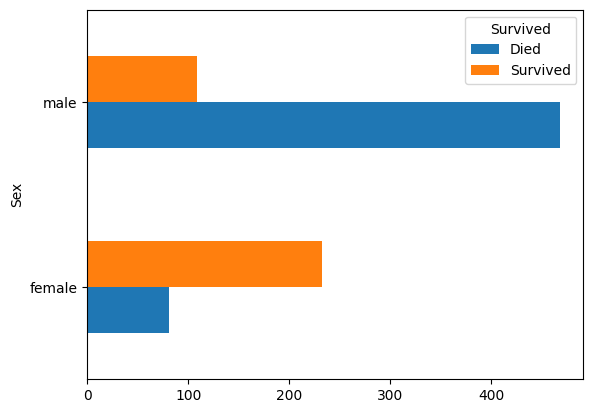

In [ ]:
sex_cnt = titanic['Sex'].value_counts()
data = titanic['Survived'].groupby(titanic['Sex']).value_counts()
data = data.unstack()
data.plot.barh()
# titanic['Survived']

<Axes: ylabel='Sex'>

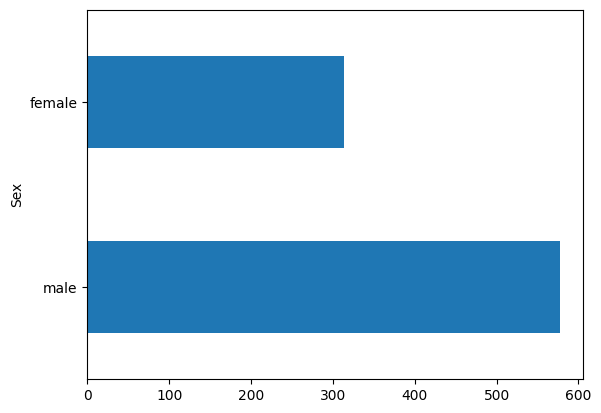

In [ ]:
sex_cnt.plot.barh()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.0, 30.0]"
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30.0, 50.0]"
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.0, 30.0]"
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30.0, 50.0]"
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30.0, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Died,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20.0, 30.0]"
887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10.0, 20.0]"
888,889,Died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20.0, 30.0]"


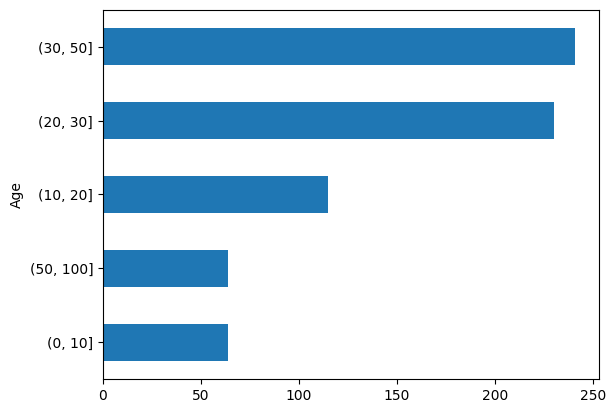

In [ ]:
titanic['Age']
bins = [0,10,20,30,50,100]
pd.cut(titanic['Age'],bins).value_counts().sort_values().plot.barh()
age_group = pd.cut(titanic['Age'],bins)
titanic['age_group'] = age_group
titanic

,Survived,Age
0,Died,"(20, 30]"
1,Died,"(30, 50]"
2,Died,"(10, 20]"
3,Died,"(50, 100]"
4,Died,"(0, 10]"
5,Survived,"(30, 50]"
6,Survived,"(20, 30]"
7,Survived,"(10, 20]"
8,Survived,"(0, 10]"
9,Survived,"(50, 100]"


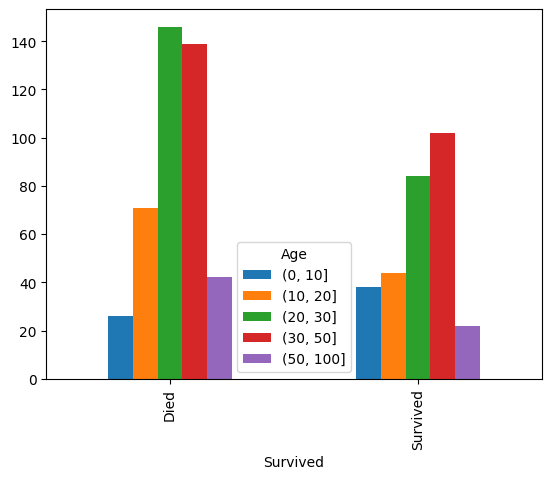

In [ ]:
age_group.groupby(titanic['Survived']).value_counts().unstack().plot.bar()
age_group.groupby(titanic['Survived']).value_counts().reset_index().drop('count',axis = 1)

<Axes: xlabel='Survived'>

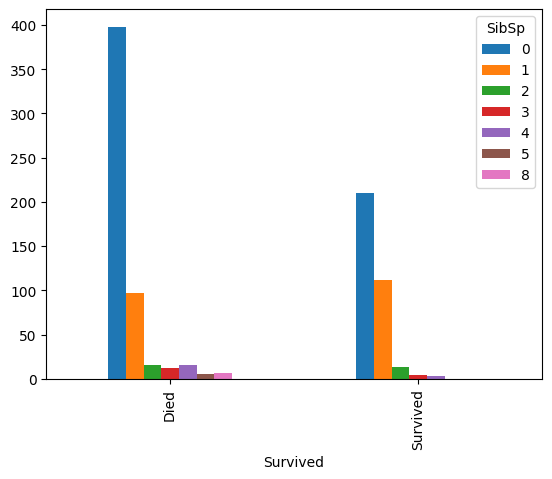

In [ ]:
titanic['SibSp'].groupby(titanic['Survived']).value_counts().unstack().plot.bar()

<Axes: xlabel='Survived'>

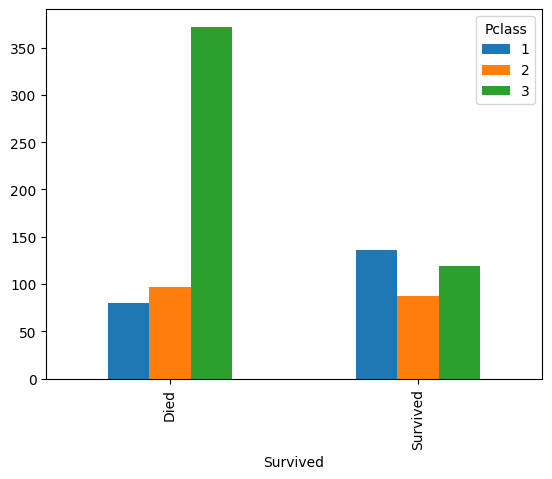

In [ ]:
titanic['Pclass'].groupby(titanic['Survived']).value_counts().unstack().plot.bar()

<Axes: xlabel='Survived'>

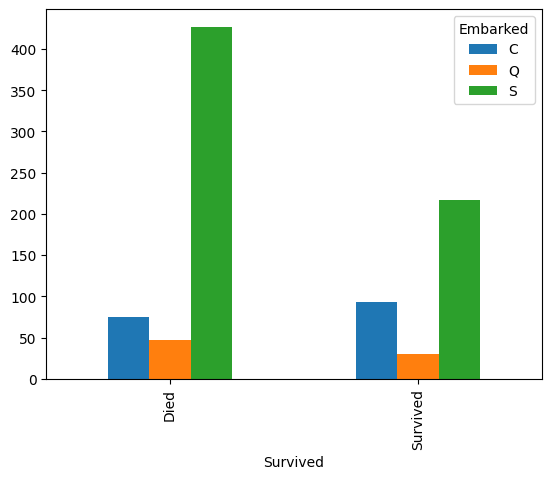

In [ ]:
titanic['Embarked'].groupby(titanic['Survived']).value_counts().unstack().plot.bar()

In [ ]:
titanic["Age"] = titanic['Age'].fillna(titanic["Age"].mean())

In [ ]:
titanic['Name'][0].split()[1]
list = []
for i in titanic['Name']:
  sirname = i.split()[1]
  list.append(sirname)
sirname = pd.Series(list)


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  age_group    714 non-null    category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 84.8+ KB


In [ ]:
# Handling Text Attribures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
encoder = OneHotEncoder()

In [ ]:
# filtered_titanic = titanic[~titanic['SibSp'].isin([4, 5, 8])]
filtered_titanic = titanic
filtered_titanic['SibSp'].value_counts()
filtered_titanic.info()
imputer = SimpleImputer(strategy = 'median')
# imputer.fit_transform(filtered_titanic[['Age']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  age_group    714 non-null    category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 84.8+ KB


In [ ]:
def final_test(titanic):
  list = []
  for i in titanic['Name']:
    sirname = i.split()[1]
    list.append(sirname)
  sirname = pd.Series(list)


  titanic['sirname'] = sirname

  bins = [0,10,20,30,50,100]
  age_group = pd.cut(titanic['Age'],bins)
  titanic['age_group'] = age_group

  titanic['family'] = titanic['Parch']+titanic['SibSp']

  # mapping = {0:'Died',1:'Survived'}
  # titanic['Survived'] = titanic['Survived'].map(mapping)


  # adding a column based on stoppage,i.e, first stoppage more tired
  mapping3 = {'C':300,'Q':200,'S':100}
  titanic['tired'] = titanic['Embarked'].map(mapping3)

  # filling Cabin null values
  titanic['Cabin'] = titanic['Cabin'].fillna('null')

  # creating a persoN_class
  titanic['person_class'] = titanic['Fare'] * titanic['Pclass']



In [ ]:
# prepearing train data

feature_list = ['Pclass','Sex','Parch','Age','SibSp','Embarked','Survived','Fare','Cabin','Ticket','age_group']
titanic_X = filtered_titanic[feature_list]
titanic_X['family'] = titanic_X['Parch']+titanic['SibSp']
mapping2 = {'Died':0,'Survived':1}
mapping3 = {'C':300,'Q':200,'S':100}

# adding a column based on stoppage,i.e, first stoppage more tired
titanic_X['tired'] = titanic_X['Embarked'].map(mapping3)


# adding a new feature 'sirname'
titanic_X['sirname'] = sirname

# filling Cabin null values
titanic_X['Cabin'] = titanic_X['Cabin'].fillna('null')

# creating a persoN_class
titanic_X['person_class'] = titanic_X['Fare'] * titanic_X['Pclass']

# titanic_X.dropna(subset = ['Embarked'],inplace = True)
y_train = titanic_X['Survived']

titanic_X = titanic_X.drop('Survived',axis = 1)
print(titanic_X.info())

mapping2 = {'Died':0,'Survived':1}
y_train = y_train.map(mapping2)
y_train.size

# titanic_Y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    object  
 2   Parch         891 non-null    int64   
 3   Age           891 non-null    float64 
 4   SibSp         891 non-null    int64   
 5   Embarked      889 non-null    object  
 6   Fare          891 non-null    float64 
 7   Cabin         891 non-null    object  
 8   Ticket        891 non-null    object  
 9   age_group     714 non-null    category
 10  family        891 non-null    int64   
 11  tired         889 non-null    float64 
 12  sirname       891 non-null    object  
 13  person_class  891 non-null    float64 
dtypes: category(1), float64(4), int64(4), object(5)
memory usage: 91.7+ KB
None


<ipython-input-21-052a22c8a7ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_X['family'] = titanic_X['Parch']+titanic['SibSp']


891

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

nums_attr = ['Pclass', 'family', 'Fare', 'person_class', 'tired']
cat_attr = ['Sex', 'Embarked', 'Cabin', 'Ticket', 'sirname','age_group']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, nums_attr),
    ('cat', cat_pipeline, cat_attr)
])

final_titanic = full_pipeline.fit_transform(titanic_X)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# RandomForest Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

random_clf = RandomForestClassifier()
gradient_clf = GradientBoostingClassifier()
X_train = final_titanic
gradient_clf.fit(X_train,y_train)


GradientBoostingClassifier()

In [ ]:
# hypertuning for gradient boost clf
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    # 'subsample': [0.8, 0.9, 1.0]
}
gradientCV = GridSearchCV(gradient_clf,param_grid,cv= 3,scoring = 'accuracy',return_train_score=True,n_jobs = -1)
gradientCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [ ]:
best_gradient_clf = gradientCV.best_estimator_
best_gradient_clf

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, max_features='sqrt',
                           min_samples_split=10, n_estimators=300)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
X_train = final_titanic
pred = cross_val_predict(best_gradient_clf,X_train,y_train,cv =3,method = 'predict_proba')
pred
# cnf_mtx =confusion_matrix(y_train,pred[:,1])
# disp = ConfusionMatrixDisplay(cnf_mtx)
# disp.plot()

array([[0.9834862 , 0.0165138 ],
       [0.00998915, 0.99001085],
       [0.47592135, 0.52407865],
       ...,
       [0.20534037, 0.79465963],
       [0.89122363, 0.10877637],
       [0.96401056, 0.03598944]])

In [ ]:
# print(precision_score(y_train,pred[:,1]))
# recall_score(y_train,pred[:,1])
roc_auc_score(y_train,pred[:,1])

0.8788280659146348

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [30,50,100],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Criteria for splitting
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

random_gridSearch = GridSearchCV(random_clf,param_grid,cv= 3,scoring = 'accuracy',return_train_score=True,n_jobs = -1)
random_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [ ]:
best_random_clf =  random_gridSearch.best_estimator_
best_random_clf

NameError: name 'random_gridSearch' is not defined

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(X_train,y_train)

svm_score = cross_val_score(svm_clf,X_train,y_train,cv = 10,scoring = 'accuracy')

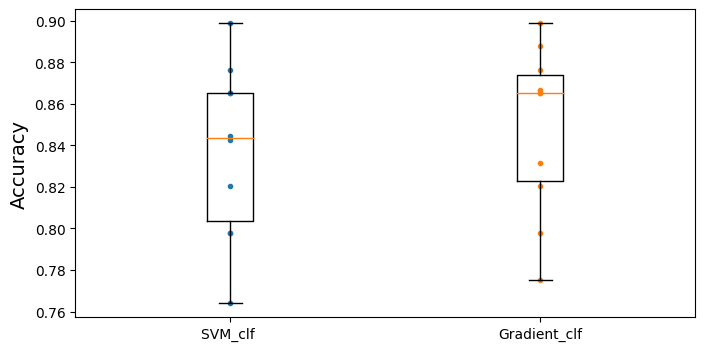

In [ ]:
gradient_score = cross_val_score(best_gradient_clf,X_train,y_train,cv =10,scoring = 'accuracy')
# random_clf_score = cross_val_score(best_random_clf,X_train,y_train,cv =10,scoring = 'accuracy')
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_score, ".")
plt.plot([2]*10, gradient_score, ".")
plt.boxplot([svm_score, gradient_score], labels=("SVM_clf ","Gradient_clf"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [ ]:
gradient_score.mean()

0.8484644194756555

In [ ]:
# gradient_score = cross_val_score(best_gradient_clf,X_train,y_train,cv =10,scoring = 'accuracy')
random_clf_score = cross_val_score(best_random_clf,X_train,y_train,cv =10,scoring = 'accuracy')
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10,svm_score , ".")
plt.plot([2]*10, gradient_score, ".")
plt.boxplot([svm_score, gradient_score], labels=("Svm_Score ","Gradient_clf"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

NameError: name 'best_random_clf' is not defined

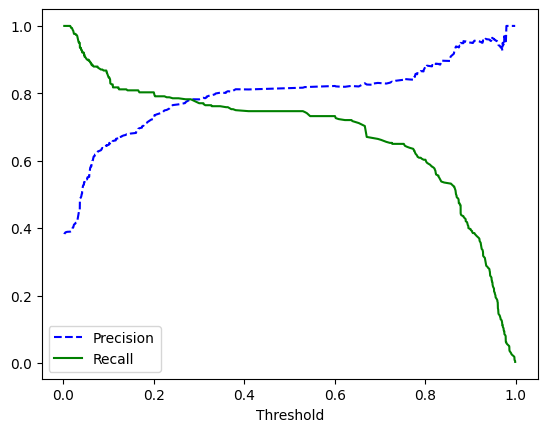

In [ ]:
precisions,recalls,thresholds = precision_recall_curve(y_train,pred[:,1])
def plot_curve(precision,recall,thresholds):
   plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
   plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
   plt.xlabel("Threshold")
   plt.legend()
plot_curve(precisions,recalls,thresholds)

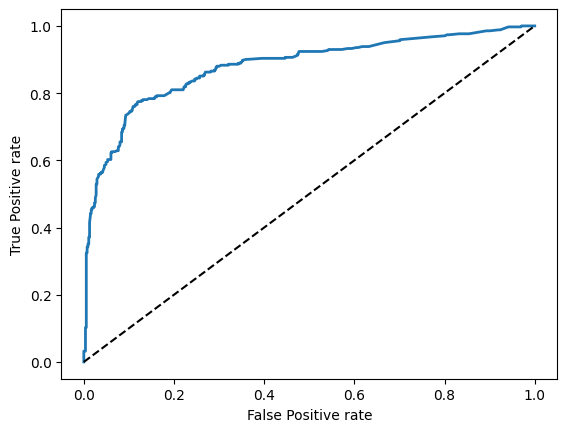

In [ ]:
fpr,tpr,thresholds = roc_curve(y_train,pred[:,1])
def plot_roc_curve(fpr, tpr, label=None):
   plt.plot(fpr, tpr, linewidth=2, label=label)
   plt.plot([0, 1], [0, 1], 'k--')
   plt.xlabel("False Positive rate")
   plt.ylabel("True Positive rate")

plot_roc_curve(fpr,tpr)

<class 'pandas.core.frame.DataFrame'>
Index: 861 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    861 non-null    int64  
 1   Sex       861 non-null    object 
 2   Parch     861 non-null    int64  
 3   Age       861 non-null    float64
 4   SibSp     861 non-null    int64  
 5   Embarked  859 non-null    object 
 6   Survived  861 non-null    object 
 7   family    861 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 92.8+ KB


<ipython-input-40-63f60181a5f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_X['family'] = titanic_X['Parch']+titanic['SibSp']


<Axes: xlabel='Survived'>

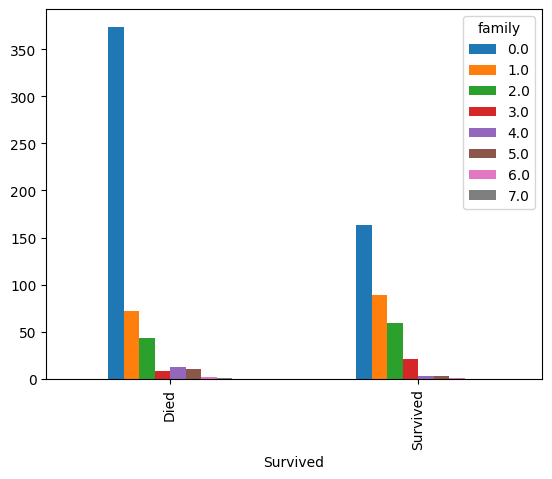

In [ ]:
titanic_X.info()
feature_list = ['Pclass','Sex','Parch','Age','SibSp','Embarked','Survived']
titanic_X = filtered_titanic[feature_list]
titanic_X['family'] = titanic_X['Parch']+titanic['SibSp']
titanic_X['family'].groupby(titanic_X['Survived']).value_counts().unstack().plot.bar()

In [ ]:
new = pd.read_csv("sample_data/test.csv")
final_test(new)
new.drop('PassengerId',axis =1 ,inplace = True)
new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           332 non-null    float64 
 4   SibSp         418 non-null    int64   
 5   Parch         418 non-null    int64   
 6   Ticket        418 non-null    object  
 7   Fare          417 non-null    float64 
 8   Cabin         418 non-null    object  
 9   Embarked      418 non-null    object  
 10  sirname       418 non-null    object  
 11  age_group     332 non-null    category
 12  family        418 non-null    int64   
 13  tired         418 non-null    int64   
 14  person_class  417 non-null    float64 
dtypes: category(1), float64(3), int64(5), object(6)
memory usage: 46.5+ KB


In [ ]:
X_test = full_pipeline.transform(new[nums_attr+ cat_attr])

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
pred = best_gradient_clf.predict(X_test)
pred
# cnf_mtx =confusion_matrix(y_train,pred[:,1])
# disp = ConfusionMatrixDisplay(cnf_mtx)
# disp.plot()

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

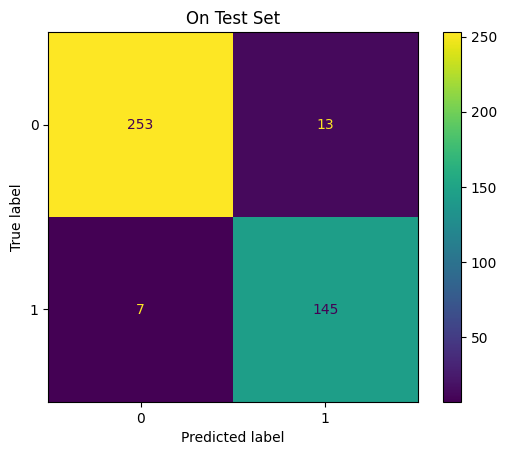

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
y_test = pd.read_csv(r"sample_data/gender_submission.csv")
cnf_mtx =confusion_matrix(y_test.iloc[:,1],pred)
disp = ConfusionMatrixDisplay(cnf_mtx)
disp.plot()
plt.title("On Test Set")
plt.show()


In [ ]:
print("Accuracy score acrros test set:",accuracy_score(y_test.iloc[:,1],pred)*100)
print("ROC_AUC score across Test Set:",roc_auc_score(y_test.iloc[:,1],pred))

Accuracy score acrros test set: 95.21531100478468
ROC_AUC score across Test Set: 0.9525375939849624


In [ ]:
submission = pd.DataFrame({'PassengerId':y_test.iloc[:,0],'Survived':pred})
submission.to_csv('submission.csv',index = False)

In [ ]:
prediction = pd.Series(pred)
prediction

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Length: 418, dtype: int64